# Download json records for all published datasets

This should work for any socrata portal

Probably need to get a token to be able to download all the data.  Right now the API call specifies the number of assets so it still works. Otherwise it only returns 100

In [8]:
#import the required libraries
import csv
import requests
import json as json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set up the code for your portal of interest

In [9]:
targeturl='https://data.wa.gov/' #change this to the SOCRATA portal you want to target, don't forget ending /
domain='data.wa.gov' 
descriptor='WA'   #change this to a recognizable descriptor for yourself- used in csv filename


### Create Dictionary json records
Use the Socrata API to get ALL metadata for the public assets

In [10]:
r=requests.get('http://api.us.socrata.com/api/catalog/v1?limit=2653&domains='+domain) #build string according to SOCRATA's convention to get public data assets
#r=requests.get('http://api.us.socrata.com/api/catalog/v1?domains='+domain) #build string according to SOCRATA's convention to get public data assets
j=json.loads(r.text) #parse the json into a list named j


### Save the json to a file so you don't have to keep downloading it everytime.

In [14]:
#j[0] #view the first record
with open("fullWA23July.json", "w") as write_file:
    json.dump(j, write_file)

In [15]:
#Open up the same file for reading
with open("fullWA23July.json", "r") as read_file:
    d = json.load(read_file)

### Test Pit

Ignore this block.  Use it to test out things or store bits of unused code

In [49]:
#The indexes for i (below) are much more limited than the indexes for j
#test=[] #test list to fill

#for c in d:
#    #for x in c:
#        if c.get('format') == 'text/csv':
#            t = c.get('identifier')
#            test.append(t)
#            #print(c.get('format'))
#test.sort()
#print(test[0:20])


#print(len(test))
#j['results'][0]['resource'].keys() #Shows keys
#type(j['identifier'])
#print(j[0]['format'])
#print(j['results'][0]['resource']['type'])
#df = pd.DataFrame(j['']) 

dataset


## Look at Types of Assets and Categories

### Types for All Assets

In [16]:
#Set up a list of all the types

typelist=[] #dim list as a empty list

for c in d['results']:  #j is the dictionary of parsed json
        if len(c['resource']['id'])==9: #Basically, is the identifier legitimate?
            typelist.append(c['resource']['type'])

print("List built:", len(typelist),"elements") #print how many elements are in dtlist


List built: 2653 elements


In [17]:
#Convert the dictionary to a dataframe
dftype = pd.DataFrame(typelist, columns=['type'])
dftype.head()

,type
0,dataset
1,map
2,map
3,dataset
4,dataset


Text(0, 0.5, '')

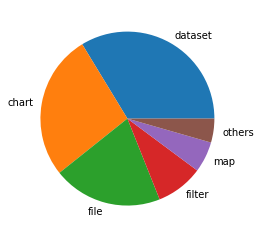

In [18]:
#Create a pie chart

pltdf = dftype.type.value_counts() #uses matlibplot to count rows for each type

pltdf = pd.DataFrame({'type':pltdf.index, 'counts':pltdf.values}) #Converts the series to a dataframe

pltdf2 = pltdf[:5].copy() #Put top 5 types in a new dataframe


# Takes the less common types and adds those counts into a value named others.
new_row = pd.DataFrame(data = {
    'type' : ['others'],
    'counts' : [pltdf['counts'][5:].sum()]
})


pltdf2 = pd.concat([pltdf2, new_row]) #Add the 'others' value to the top 5 dataframe

#https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html
#https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
#http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


#plot the types
pltdf2.plot(y='counts', kind='pie', labels=pltdf2.type, legend=False)
plt.ylabel('') #Gets rid of the "Counts label"

### Dataframe of proportions

In [21]:
dftypep = dftype.type.value_counts()
dftypep = dftypep.to_frame()
dftypep['percent'] = dftypep.type / dftypep.type.sum()
print(dftypep)

                type   percent
dataset          894  0.336977
chart            717  0.270260
file             539  0.203166
filter           233  0.087825
map              152  0.057294
federated_href    39  0.014700
href              30  0.011308
datalens          22  0.008292
form              12  0.004523
story              9  0.003392
visualization      4  0.001508
calendar           2  0.000754


### Categories for All Assets

In [22]:
#Set up a list of all the types

catlist=[] #dim masterlist as a empty list

for i in j['results']:  #j is the dictionary of parsed json
        if len(i['resource']['id'])==9: #Basically, is the identifier legitimate?
            catlist.append(i['classification'].get('domain_category', 'N/A'))


catlist.sort()
print("List built:", len(catlist),"elements") #print how many elements are in dtlist

List built: 2653 elements


In [23]:
#Convert the list to a dataframe
dfcat = pd.DataFrame(catlist, columns = ['category'])
dfcat.head()

,category
0,Agriculture
1,Consumer Protection
2,Consumer Protection
3,Consumer Protection
4,Consumer Protection


Text(0, 0.5, '')

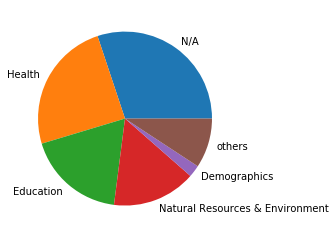

In [24]:
#Create a pie chart

pltdf = dfcat.category.value_counts() #uses matlibplot to count rows for each type

pltdf = pd.DataFrame({'category':pltdf.index, 'counts':pltdf.values}) #Converts the series to a dataframe

pltdf2 = pltdf[:5].copy() #Put top 5 types in a new dataframe


# Takes the less common types and adds those counts into a value named others.
new_row = pd.DataFrame(data = {
    'category' : ['others'],
    'counts' : [pltdf['counts'][5:].sum()]
})


pltdf2 = pd.concat([pltdf2, new_row]) #Add the 'others' value to the top 5 dataframe

#https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html
#https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
#http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


#plot the types
pltdf2.plot(y='counts', kind='pie', labels=pltdf2.category, legend=False)
plt.ylabel('') #Gets rid of the "Counts label"

### Dataframe of proportions

In [25]:
dfcatp = dfcat.category.value_counts()
dfcatp = dfcatp.to_frame()
dfcatp['percent'] = dfcatp.category / dfcatp.category.sum()
print(dfcatp)

                                 category   percent
N/A                                   799  0.301168
Health                                651  0.245383
Education                             486  0.183189
Natural Resources & Environment       413  0.155673
Demographics                           59  0.022239
Economics                              53  0.019977
Public Safety                          41  0.015454
Politics                               35  0.013193
Procurements and Contracts             33  0.012439
Labor                                  32  0.012062
Consumer Protection                    26  0.009800
Transportation                         10  0.003769
Recreation                              8  0.003015
Employment                              6  0.002262
Agriculture                             1  0.000377


In [26]:
downl = []
views=[]

for i in j['results']:  #j is the dictionary of parsed json
        if len(i['resource']['id'])==9: #Basically, is the identifier legitimate?
            downl.append(i['resource']['download_count'])

for i in j['results']:  #j is the dictionary of parsed json
        if len(i['resource']['id'])==9: #Basically, is the identifier legitimate?
            views.append(i['resource']['page_views']['page_views_total'])  

print("List built:", len(downl),"download counts") #print how many elements are in dtlist
print("List built:", len(views),"view counts") #print how many elements are in dtlist            

dfuse = pd.DataFrame([downl,views,typelist]).T #build a dataframe with both lists and the category list
dfuse.columns =['downloads','pageviews','type']

List built: 2653 download counts
List built: 2653 view counts


In [34]:
# dfuse dataframe may need an index column to work with box plots better!!!
#d['results'][0]

Text(0.5, 0.98, '')

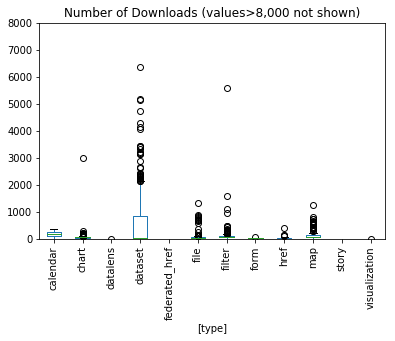

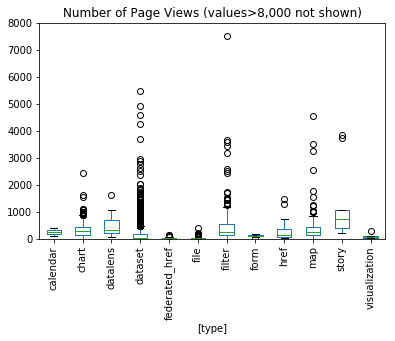

In [27]:
dfuse.boxplot(by = ['type'], column=['downloads'], grid=False)
plt.ylim(0,8000)
plt.xticks(rotation=90)
plt.title('Number of Downloads (values>8,000 not shown)')
plt.suptitle("")

dfuse.boxplot(by = ['type'], column=['pageviews'], grid=False)
plt.ylim(0,8000)
plt.xticks(rotation=90)
plt.title('Number of Page Views (values>8,000 not shown)')
plt.suptitle("")

### downloads vs views

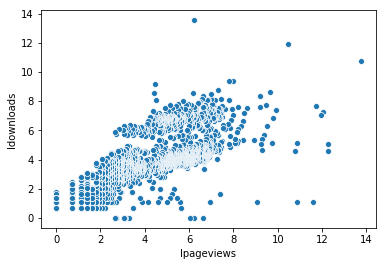

In [115]:
#Calculate logs for downloads and views, only use where use is greater than 0
dfusenum['downloads'] = pd.to_numeric(dfusenum['downloads'])
dfusenum['pageviews'] = pd.to_numeric(dfusenum['pageviews'])
dfusedataset = dfusenum[dfuse['type']=='dataset']
dfusedataset = dfusenum[dfuse.downloads > 0]
dfusedataset['lpageviews'] = np.log(dfusedataset.pageviews)
dfusedataset['ldownloads'] = np.log(dfusedataset.downloads)
sns.scatterplot('lpageviews', # Horizontal axis
           'ldownloads', # Vertical axis
           data=dfusedataset)



### Create a list of all the uids that are datasets

In [31]:
dtlist=[] #dim masterlist as a empty list

for c in d:  #d is the dictionary of parsed json
        if len(c['resource']['id'])==9: #Basically, is the identifier legitimate?
            if c.get('format')=='text/csv':  #select only datasets (not pdfs or external links)
                uid=c['identifier']
                dtlist.append(uid)


dtlist.sort()
print("List built:", len(dtlist),"elements") #print how many elements are in dtlist
#print(fulllist[0:100]) See the first hundred if you want to check

TypeError: string indices must be integers

### If you want to see the list of urls for metadata, run this code

In [37]:
for m in dtlist:
    print(targeturl+'views/'+m+'.json') #build string according to SOCRATA's convention


## Create a csv of the metadata

Basic order of operations:
Set up csv file with titles
For loop to cycle through masterlist of dataset ids from above

    Retrieve json file
    Count the number of columns
    Count the number of non empty column desctiptions
    Write elements to csv file, convert the dates, and tack on the two count values

Here are the columns: 'id','name','description','category','downloadCount','viewCount','licenseId','publicationDate','rowsUpdateAt','tags','rowLabel','numberColumns','numColumnDescriptions'

In [18]:
metadata=open(descriptor+' - METADATA.csv', 'w', newline='')
csv.writer(metadata).writerow(['id','name','description','category','downloadCount','viewCount','licenseId','publicationDate','rowsUpdateAt','tags'])

metadata=open(descriptor+' - METADATA.csv', 'w', newline='')
csv.writer(metadata).writerow(['id','name','description','category','downloadCount','viewCount','licenseId','publicationDate','rowsUpdateAt','tags','rowLabel','numberColumns','numColumnDescriptions'])
for s in dtlist:
    s=requests.get(targeturl+'views/'+s+'.json') #build string according to SOCRATA's convention
    r=json.loads(s.text)
    
    colnum = len(r['columns']) #Get number of columns
    
    count = 0
    for q in r['columns']:  #Tally the number of col descriptions that contain a description
        if q.get('description','') != '': #If the description key doesn't exist, default value is '' (don't know why some don't have the key)
            count += 1
    coldesc = count
    #write the values to the csv file. Dates in json files are seconds from jan 1 1970 so datetime.datetime.fromtimestamp converts
    #This doesn't work on Seattle's:,datetime.datetime.fromtimestamp(r.get('rowsUpdatedAt','N/A'))
    csv.writer(metadata).writerow([r['id'].encode("utf-8"),r['name'].encode("utf-8"),r.get('description','N/A'),r.get('category','N/A'),r['downloadCount'],r['viewCount'],r.get('LicenseID','N/A'),datetime.datetime.fromtimestamp(r['publicationDate']),r.get('tags','N/A'),r['metadata'].get('rowLabel','N/A'),colnum,coldesc]) #write one line to csv file

metadata.close() #Close the output file, release all locks
print(len(j)-1,"of",len(j)-1,"rows written, 0 remaining")

604 of 604 rows written, 0 remaining
